In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statistics import *
from math import *

from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as cv
np.set_printoptions(suppress=True)

In [2]:
steam = pd.read_csv("./steam-clean.csv")
df = steam
#df = df[(df.positive_ratings > 100) & (df.negative_ratings > 100)]
df = df[(df.owners > 20000)]
df = df[df.price <= 60]
df.drop(['score','median_playtime','windows','total_ratings'], axis=1,inplace=True)
df.to_csv('steam-clean-r.csv', index = False)

In [3]:
#df['price'].quantile([1/3,2/3,1.])
df['price_range'] = pd.qcut(df[df.price != 0]['price'], [0., 1/3, 2/3, 1.],labels=['Cheap', 'Midrange', 'Expensive'], retbins=True)[0]
#df['price_range'] = pd.cut(df[df.price != 0]['price'], [0,10,20,np.inf],labels=['Cheap', 'Midrange', 'Expensive'], retbins=True)[0]
df['price_range'].value_counts()
print(df[df.price != 0]['price'].quantile([0,1/3,2/3,1]))

df['price_range'].cat.add_categories('Free',inplace=True)
df['price_range'].cat.reorder_categories(['Free','Cheap', 'Midrange', 'Expensive'],inplace=True)
df.loc[df.price == 0, 'price_range'] = 'Free'
df[df.price == 0]['price_range']
df.loc[df.price == 0,'price_range']

0.000000     0.32
0.333333     3.99
0.666667     8.99
1.000000    54.99
Name: price, dtype: float64


11       Free
14       Free
15       Free
19       Free
22       Free
         ... 
22859    Free
22862    Free
22876    Free
22880    Free
22907    Free
Name: price_range, Length: 1430, dtype: category
Categories (4, object): [Free < Cheap < Midrange < Expensive]

In [4]:
df['price_range'].value_counts()

Cheap        2547
Expensive    2244
Midrange     2108
Free         1430
Name: price_range, dtype: int64

In [5]:
X = df.drop(['price_range', 'price'],axis=1).select_dtypes(include='number')
y = df.price_range

(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.20, random_state=1)

training = X_train.join(y_train)
testing = X_test.join(y_test)

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#base_clf = RandomForestClassifier(n_estimators=100)
#clf = AdaBoostClassifier(base_estimator=base_clf, n_estimators=1,random_state=0)
clf = RandomForestClassifier(n_estimators=100,random_state=1).fit(X_train,y_train)
y_pred = cross_val_predict(clf, X=X_train, y=y_train, cv=5)
#precision, recall, fscore, _ = metrics.precision_recall_fscore_support(y_train, y_pred)

In [7]:
metrics.confusion_matrix(y_train, y_pred)
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       Cheap       0.68      0.73      0.70      2068
   Expensive       0.68      0.73      0.70      1810
        Free       0.98      0.83      0.90      1121
    Midrange       0.51      0.48      0.50      1664

    accuracy                           0.68      6663
   macro avg       0.71      0.69      0.70      6663
weighted avg       0.69      0.68      0.69      6663



In [8]:
metrics.accuracy_score(y_train, y_pred, normalize=True, sample_weight=None)

0.6840762419330632

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
base_clf = RandomForestClassifier(n_estimators=100)
#base_clf = DecisionTreeClassifier()
#base_clf = KNeighborsClassifier(weights='distance')
#X_scaled = preprocessing.MinMaxScaler().fit_transform(X_train)
#base_clf = ExtraTreesClassifier(n_estimators=300)
#clf = AdaBoostClassifier(base_estimator=base_clf, n_estimators=10,random_state=0).fit(X_train,y_train)
clf = RandomForestClassifier(n_estimators=100, random_state=1).fit(X_train,y_train)

#X_scaled = preprocessing.MinMaxScaler().fit_transform(X_test)
y_pred = clf.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Cheap       0.65      0.78      0.71       479
   Expensive       0.71      0.78      0.74       434
        Free       0.98      0.83      0.90       309
    Midrange       0.61      0.49      0.54       444

    accuracy                           0.71      1666
   macro avg       0.74      0.72      0.72      1666
weighted avg       0.71      0.71      0.71      1666



In [10]:
metrics.accuracy_score(y_test, y_pred)

0.709483793517407

In [11]:
#df.loc[df.price == 0, 'price_range'] = 'Free'
#df.loc[df.price != 0, 'price_range'] = 'Paid'
#df['price_range'].value_counts()

In [12]:
#try other classifiers and predictors and compare them in the report

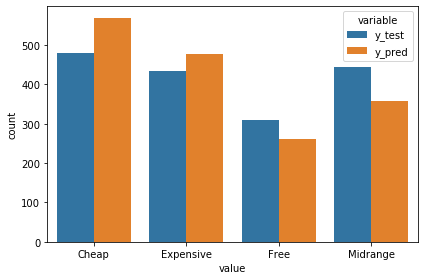

In [13]:
pred = pd.DataFrame()
pred['y_test']=y_test
pred['y_pred']=y_pred
sns.countplot(x="value", hue="variable", data=pd.melt(pred))
#plt.show()
#pd.Series(y_pred).value_counts()
plt.tight_layout()
plt.savefig('images/ypred-ytest-clf.pdf', bbox_inches='tight')

In [14]:
df['price_range'].value_counts()/df['price_range'].value_counts().sum()

Cheap        0.305799
Expensive    0.269420
Midrange     0.253092
Free         0.171689
Name: price_range, dtype: float64

In [15]:
#Regression with price
X = df.drop(['price'],axis=1)
y = df.price
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.20, random_state=1)
#training = X_train.join(y_train)
#testing = X_test.join(y_test)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.svm import SVR
#regressor = RandomForestRegressor()
regressor = RandomForestRegressor(100, random_state=1)
#regressor = SVR()
regressor.fit(X_train.select_dtypes(include='number'), y_train)

y_pred = regressor.predict(X_test.select_dtypes(include='number'))
metrics.r2_score(y_test, y_pred)

0.6151549563773666

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
regressor.score(X_test.select_dtypes(include='number'), y_test)

Mean Absolute Error: 3.06880006002401
Mean Squared Error: 24.616897339249697
Root Mean Squared Error: 4.961541830847514


0.6151549563773666

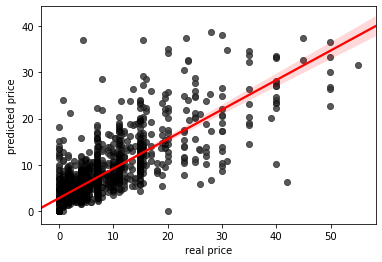

In [18]:
plt.scatter(y_test, y_pred,  color='gray')
sns.regplot(x=y_test,y=y_pred, scatter_kws={"color": "black",'alpha':0.3}, line_kws={"color": "red"})
#abline(regressor.coef_, regressor.intercept_)
#plt.plot(y_test, y_pred, color='red', linewidth=2)
plt.xlabel('real price')
plt.ylabel('predicted price')
plt.savefig('images/ypred-ytest-reg.pdf', bbox_inches='tight')